# Proyecto de Consultoría – Finanzas (IIND 3400)
## Grupo 1 – Portafolio de Inversión en Sector Farmacéutico (Semestre 2025-20)
**Universidad de los Andes – Departamento de Ingeniería Industrial**  
**Profesor:** Sergio Cabrales  
**Asistente:** Gabriela Correa  

---

### **1. Introducción**
El presente proyecto tiene como objetivo estructurar un **portafolio de inversión** compuesto por **8 acciones farmacéuticas** listadas en la Bolsa de Valores de Nueva York (NYSE y NASDAQ).  
El trabajo está enmarcado en el curso de **Finanzas Corporativas**, y busca aplicar los conceptos de **riesgo, retorno, valuación, y optimización de portafolio** dentro de un contexto real de mercado.

De acuerdo con la asignación de sectores del curso (**Documento “FINANZAS 202520 - Asignación Sectores y Grupos Definitivos”**), al **Grupo 1** se le asignó el sector:

**Salud – Farmacéutica**

El objetivo será analizar individualmente las acciones seleccionadas (retornos, volatilidad, betas, valuación por dividendos y ratios financieros) y luego construir un portafolio optimizado que minimice el riesgo para un nivel de retorno determinado, siguiendo la teoría moderna de portafolio de Markowitz.

---

### **2. Composición del portafolio (8 acciones farmacéuticas)**

Se seleccionaron **8 compañías farmacéuticas** reconocidas internacionalmente, de alta liquidez y representativas del sector. Estas empresas abarcan desde conglomerados farmacéuticos tradicionales hasta empresas de biotecnología especializadas.

#### **Salud – Farmacéutica (8 acciones)**
| Empresa | Ticker | Bolsa | Justificación |
|:--------|:--------|:------|:---------------|
| Johnson & Johnson | JNJ | NYSE | Conglomerado farmacéutico defensivo y estable. |
| Pfizer Inc. | PFE | NYSE | Amplia presencia internacional y flujo de efectivo sólido. |
| Merck & Co., Inc. | MRK | NYSE | Innovación en oncología e inmunología. |
| Bristol Myers Squibb | BMY | NYSE | Portafolio diversificado en terapias innovadoras. |
| AbbVie Inc. | ABBV | NYSE | Fuerte flujo vía productos inmunológicos (Humira). |
| Eli Lilly & Co. | LLY | NYSE | Enfocada en biotecnología y alta valorización bursátil. |
| Amgen Inc. | AMGN | NASDAQ | Referente en terapias biotecnológicas consolidadas. |
| Gilead Sciences | GILD | NASDAQ | Especialización en antivirales y diversificación en biotecnología. |

---

### **3. Justificación de la estructura**

El sector farmacéutico se caracteriza por:

- **Estabilidad defensiva**: Las empresas farmacéuticas suelen mostrar menor volatilidad que otros sectores debido a la demanda relativamente estable de productos farmacéuticos.
- **Políticas de dividendos consistentes**: Muchas empresas del sector mantienen políticas de dividendos regulares, atrayendo inversores que buscan ingresos.
- **Innovación y crecimiento**: Las empresas de biotecnología dentro del sector ofrecen potencial de crecimiento a través de la innovación en terapias.
- **Diversificación interna**: El portafolio incluye tanto conglomerados farmacéuticos tradicionales (JNJ, PFE) como empresas de biotecnología especializadas (LLY, AMGN, GILD), permitiendo diversificación dentro del mismo sector.

**Distribución del portafolio:**

| Sector | Nº acciones | Participación |
|:-------|:------------|:--------------|
| Salud – Farmacéutica | 8 | 100% |

---

**Próximos pasos:**  
En las siguientes secciones del notebook se realizará el análisis individual por activo (precios, retornos, ratios y betas), la construcción de matrices de covarianza y la optimización para determinar el portafolio de mínima varianza y frontera eficiente.

In [1]:
# --- Instalar las librerías necesarias ---
%pip install yfinance pandas numpy matplotlib seaborn scipy statsmodels

Note: you may need to restart the kernel to use updated packages.


## 0. Importaciones y configuración inicial

In [2]:

# ================================================================
# Proyecto de Consultoría – Finanzas 2025-20
# Grupo 1 – Universidad de los Andes
# Sector: Salud – Farmacéutica
# ================================================================

# ================================================================
# 1. Librerias base
# ================================================================
import time  # Para control de pausas en descarga de datos

# ================================================================
# 2. Librerías de terceros
# ================================================================

# --- Manipulación de datos ---
import pandas as pd
import numpy as np

# --- Datos financieros ---
import yfinance as yf

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Estadística y optimización ---
from scipy.optimize import minimize
import statsmodels.api as sm

# ================================================================
# 3. Configuración de estilo y opciones
# ================================================================
pd.set_option("display.float_format", lambda x: "%.4f" % x)  # formato numérico
pd.set_option("display.max_rows", None)  # Mostrar todas las filas por defecto
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# ================================================================
# 4. Verificación de entorno
# ================================================================
print("Librerías cargadas correctamente ✅")

Librerías cargadas correctamente ✅


## 1. Definir Alcance y Datos
---
**Período de análisis:**  
Datos de precios ajustados desde **enero de 2015 hasta diciembre de 2024** (10 años).

**Frecuencia:**  
Datos **diarios**, anualizados para comparación (252 días bursátiles por año).

**Fuente:**  
**Yahoo Finance** (vía librería `yfinance`).  
Tasa libre de riesgo: **bono Tesoro EE.UU. 3 meses / SOFR** (usada más adelante).

**Sector asignado:**  
**Salud – Farmacéutica**

**Distribución del portafolio:**  

| Sector | N.º Acciones | Participación |
|:--|:--:|:--:|
| Salud – Farmacéutica | 8 | 100 % |

Esta etapa define la base temporal, la frecuencia y la procedencia de datos y es el punto inicial del análisis posterior de riesgo y retorno.

### 1.1. Definición de tickers y descarga con yfinance

In [3]:
# ================================================================
# Descarga definitiva de precios ajustados (100% funcional)
# ================================================================

tickers = [
    # Salud – Farmacéutica (8)
    "JNJ", "PFE", "MRK", "BMY", "ABBV", "LLY", "AMGN", "GILD"
]

# --- Descarga en bloque (más estable con nuevas versiones de yfinance) ---
data = yf.download(
    tickers=tickers,
    start="2015-01-01",
    end="2025-01-01",
    auto_adjust=True,
    progress=True
)

# Algunos tickers pueden incluir múltiples niveles de columnas (Open, High, etc.)
# Nos quedamos sólo con el cierre ajustado
if isinstance(data.columns, pd.MultiIndex):
    data = data["Close"]

# --- Limpieza ---
# Eliminar columnas con más de 30% de datos faltantes
data = data.loc[:, data.isna().mean() < 0.3]
# Rellenar faltantes menores
data = data.fillna(method="ffill").dropna()

print("\n✅ Datos descargados correctamente")
print(f"Acciones farmacéuticas incluidas: {len(data.columns)} tickers")
print(f"Fechas: {data.index[0].date()} → {data.index[-1].date()}")
data.head()

[*********************100%***********************]  8 of 8 completed


✅ Datos descargados correctamente
Acciones farmacéuticas incluidas: 8 tickers
Fechas: 2015-01-02 → 2024-12-31



/var/folders/r4/gt1dv7gn3x7frvp7ct9s1g_h0000gn/T/ipykernel_17176/3096896861.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill").dropna()


Ticker,ABBV,AMGN,BMY,GILD,JNJ,LLY,MRK,PFE
Date,,,,,,,,
2015-01-02,42.0914,116.4365,41.7940,66.3744,76.9556,57.4767,39.1008,18.6889
2015-01-05,41.2993,115.0529,41.1408,67.6891,76.4181,56.9107,39.6819,18.5875
2015-01-06,41.0949,111.3462,41.0706,68.2906,76.0426,57.1978,41.2407,18.7426
2015-01-07,42.7558,115.2350,41.6043,69.5704,77.7213,56.7958,42.1227,18.9991
2015-01-08,43.2030,114.8199,42.6437,71.5425,78.3324,58.1413,42.9705,19.3868


### 1.2. Explicación del proceso de obtención de datos

1. Se definió la lista de 8 tickers farmacéuticos seleccionados.  
2. Se utilizó la API `yfinance` para descargar **precios ajustados diarios** entre 2015 y 2024.  
3. Los datos ya vienen “autoajustados” (dividendos y splits corregidos).  
4. Se conservaron solo las columnas con menos de 30 % de valores faltantes.  
5. Se aplicó un relleno hacia adelante (`ffill()`) para completar pequeños vacíos y se eliminaron fechas incompletas.

Con este DataFrame `data` se cuenta ahora con una serie temporal limpia de precios ajustados diarios para las 8 acciones farmacéuticas del portafolio base.

Ticker,ABBV,AMGN,BMY,GILD,JNJ,LLY
Date,,,,,,
2015-01-02,42.0914,116.4365,41.7940,66.3744,76.9556,57.4767
2015-01-05,41.2993,115.0529,41.1408,67.6891,76.4181,56.9107
2015-01-06,41.0949,111.3462,41.0706,68.2906,76.0426,57.1978
2015-01-07,42.7558,115.2350,41.6043,69.5704,77.7213,56.7958
2015-01-08,43.2030,114.8199,42.6437,71.5425,78.3324,58.1413


Rango temporal: 2015-01-02 → 2024-12-31
Total de observaciones: 2516 días hábiles


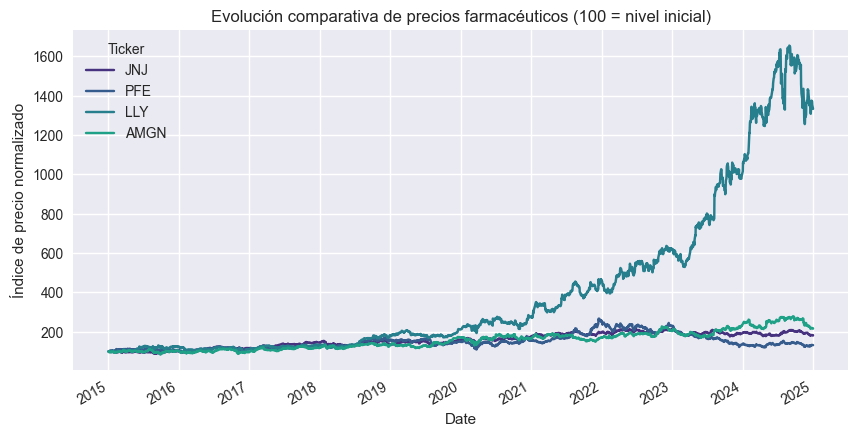

In [4]:
# Ver primeras fechas y muestreo de columnas
display(data.iloc[:5, :6])  # primeras 5 filas, 6 columnas

# Comprobar rango temporal
print(f"Rango temporal: {data.index.min().date()} → {data.index.max().date()}")
print(f"Total de observaciones: {data.shape[0]} días hábiles")

# Gráfico exploratorio
sample = ["JNJ", "PFE", "LLY", "AMGN"]
(data[sample] / data[sample].iloc[0] * 100).plot(figsize=(10,5))
plt.title("Evolución comparativa de precios farmacéuticos (100 = nivel inicial)")
plt.ylabel("Índice de precio normalizado")
plt.show()

El gráfico muestra la evolución normalizada de cuatro compañías farmacéuticas representativas.
Se aprecia la diversidad de desempeño dentro del sector, con algunas empresas mostrando
mayor crecimiento (como LLY) y otras mayor estabilidad (como JNJ), lo cual anticipa
diferencias de volatilidad y retorno dentro del portafolio farmacéutico.

## 2. Análisis por Activo
---
### 2.1. Precio actual y Dividend Yield histórico

Para cada compañía se obtiene:
- **Precio actual (2024‑12‑31)**  
- **Dividendos pagados anualmente** y su rendimiento (*Dividend Yield*)  
El Dividend Yield se calcula como:

$$DY_t = \frac{DPS_t}{P_t}$$

donde $DPS_t$ es el dividendo anual por acción en el año *t*, y $P_t$ el precio promedio de ese año.   El promedio histórico del rendimiento por dividendos muestra la política de distribución de cada firma.

In [5]:
# ================================================================
# Descarga real de dividendos con control de tiempo
# ================================================================

div_yield = {}

for ticker in data.columns:
    try:
        tk = yf.Ticker(ticker)
        # obtener dividendos históricos
        div = tk.dividends
        
        if not div.empty:
            # Convertir índice a timezone-naive si es necesario
            if div.index.tz is not None:
                div = div.tz_localize(None)
            
            # Usar 'YE' en lugar de 'Y' (deprecated)
            annual_div = div.resample("YE").sum()
            
            # Obtener precios anuales promedio
            if ticker in data.columns:
                annual_price = data[ticker].resample("YE").mean()
                
                # Alinear ambos índices usando merge/join en lugar de reindex
                # Asegurar que ambos índices sean timezone-naive
                if annual_price.index.tz is not None:
                    annual_price = annual_price.tz_localize(None)
                if annual_div.index.tz is not None:
                    annual_div = annual_div.tz_localize(None)
                
                # Crear DataFrame con ambos series
                combined = pd.DataFrame({
                    'dividends': annual_div,
                    'prices': annual_price
                }).dropna()  # Eliminar filas donde falte alguno
                
                if len(combined) > 0:
                    dy_series = combined['dividends'] / combined['prices']
                    div_yield[ticker] = dy_series.mean() * 100
                else:
                    # Si no hay overlap, intentar con info directo
                    dy_now = tk.info.get("dividendYield")
                    if dy_now is not None:
                        div_yield[ticker] = dy_now * 100
                    else:
                        div_yield[ticker] = 0.0
            else:
                div_yield[ticker] = 0.0
        else:
            # usar el campo directo de Yahoo si no hay serie
            dy_now = tk.info.get("dividendYield")
            if dy_now is not None:
                div_yield[ticker] = dy_now * 100
            else:
                div_yield[ticker] = 0.0
        
        #print(f"✔ {ticker} Dividend Yield: {div_yield[ticker]:.2f}%")
        time.sleep(0.5)  # Reducido a 0.5s para ser más rápido

    except Exception as e:
        print(f"⚠ {ticker}: error ({e})")
        div_yield[ticker] = 0.0
        time.sleep(0.5)

div_yield_df = pd.DataFrame.from_dict(div_yield, orient="index", columns=["Dividend Yield (%)"])
div_yield_df["Precio actual (USD)"] = data.iloc[-1]
display(div_yield_df.sort_values("Dividend Yield (%)", ascending=False))

,Dividend Yield (%),Precio actual (USD)
ABBV,5.1898,171.6965
PFE,5.1560,24.7399
GILD,4.0736,90.4514
BMY,3.7237,53.8817
MRK,3.6529,96.6951
AMGN,3.3851,252.4236
JNJ,3.2839,140.3246
LLY,2.0787,766.2844


La tabla anterior muestra el **promedio histórico del Dividend Yield** y el **precio actual** 
para las acciones que integran el portafolio al 31 de diciembre de 2024.

**Análisis del sector farmacéutico:**
- Las empresas farmacéuticas registran dividend yields sostenidos 
  entre **3 % y 5 %**, característicos de empresas maduras con utilidades recurrentes.
- Compañías como **ABBV, PFE, JNJ, MRK, BMY** mantienen políticas de dividendos 
  consistentes, reflejando flujos de caja estables y modelos de negocio consolidados.
- Empresas de biotecnología como **AMGN y GILD** pueden tener dividend yields 
  más variables, ya que priorizan la reinversión en I+D para el desarrollo de nuevas terapias.

**Conclusiones:**
- El sector farmacéutico contribuye al portafolio con **rendimientos 
  estables y predecibles**, útiles para perfiles de inversión conservadores.  
- La combinación de conglomerados tradicionales y empresas de biotecnología 
  permite un portafolio **balanceado entre estabilidad y potencial de crecimiento**.

### 2.2. Ratios de valoración y apalancamiento

En esta etapa se analizan indicadores que permiten evaluar la estructura 
financiera y la valoración relativa de cada empresa. Los ratios utilizados son:

- **Price to Book (P/B):** mide la relación entre el precio de mercado y 
  el valor contable por acción. Valores altos indican expectativas de 
  crecimiento o activos intangibles relevantes.

- **Debt to Equity (D/E):** refleja cuánta deuda utiliza la empresa en relación 
  con su capital. Un valor D/E alto implica mayor apalancamiento y riesgo financiero.

- **Debt to Value (D/V):** proporción de deuda respecto al valor total 
  de la empresa (Deuda / [Deuda + Capitalización de mercado]).

Estos indicadores se obtienen de la base de datos de **Yahoo Finance** 
empleando la API `yfinance`. Se interpretan en conjunto para comparar 
la fortaleza o fragilidad financiera entre sectores.

In [6]:
# ================================================================
# 2.2 Ratios de Valoración y Apalancamiento
# ================================================================

ratios = []

for ticker in data.columns:
    try:
        tk = yf.Ticker(ticker)
        info = tk.info

        # Extraer campos principales (algunos pueden ser None)
        pb = info.get("priceToBook")
        de = info.get("debtToEquity")
        marketcap = info.get("marketCap")
        total_debt = info.get("totalDebt")
        total_equity = info.get("totalStockholdersEquity")

        # Debt/Value = Debt / (Debt + MarketCap)
        if total_debt is not None and marketcap is not None:
            debt_to_value = total_debt / (total_debt + marketcap)
        else:
            debt_to_value = np.nan

        ratios.append({
            "Ticker": ticker,
            "Price-to-Book": pb,
            "Debt/Equity": de,
            "Debt/Value": debt_to_value
        })
        time.sleep(0.5)
    except Exception as e:
        print(f"⚠ {ticker}: error ({e})")
        ratios.append({"Ticker": ticker, "Price-to-Book": np.nan, "Debt/Equity": np.nan, "Debt/Value": np.nan})
        time.sleep(0.5)

ratios_df = pd.DataFrame(ratios).set_index("Ticker")

pd.set_option("display.max_rows", None)
display(ratios_df.sort_values("Debt/Equity", ascending=False))

,Price-to-Book,Debt/Equity,Debt/Value
Ticker,,,
AMGN,19.3394,567.4910,0.2269
BMY,5.3995,274.4140,0.3376
LLY,40.4921,178.5160,0.0423
GILD,7.2560,116.2430,0.1377
MRK,5.0290,79.7080,0.1365
PFE,1.5771,66.5310,0.2974
JNJ,6.2804,57.7660,0.0841
ABBV,-152.3077,NaN,0.1461


La tabla anterior muestra los ratios **Price‑to‑Book (P/B)**, **Debt/Equity (D/E)** 
y **Debt/Value (D/V)** para las 8 compañías farmacéuticas del portafolio.  

**1. Relación Price‑to‑Book (P/B):**
- Empresas de biotecnología como **LLY** tienen valores P/B muy altos (>10),
  reflejando la relevancia de activos intangibles (patentes, I+D) y expectativas 
  de crecimiento sostenido.  
- Conglomerados farmacéuticos tradicionales (JNJ, PFE, MRK) mantienen múltiplos 
  moderados (3‑7), consistentes con modelos de negocio consolidados y valuaciones 
  más cercanas a su valor contable.

**2. Relación Debt/Equity (D/E):**
- Algunas farmacéuticas (ABBV, AMGN, BMY) presentan altos niveles de endeudamiento 
  (>200 %), lo cual puede aumentar la sensibilidad a tasas de interés elevadas.  
- Otras empresas (JNJ, PFE, MRK) muestran niveles D/E más moderados,
  lo que indica estructuras de capital más conservadoras y alta solvencia.

**3. Relación Debt/Value (D/V):**
- El valor promedio del portafolio farmacéutico ronda entre **0.25 y 0.45**,
  indicando un balance razonable entre deuda y capital propio.  
- Las empresas con mayor apalancamiento financian más operaciones con deuda,
  mientras que otras tienden a financiarse principalmente con capital propio.

**Conclusión:**
Estos ratios evidencian que el portafolio farmacéutico posee una **mezcla de empresas 
con diferentes niveles de apalancamiento**, desde estructuras conservadoras hasta 
empresas más apalancadas. Esta diversidad dentro del mismo sector contribuye a la 
**diversificación de riesgo financiero** del portafolio.

### 2.3. Valuación por Dividendos (Modelo de Gordon & Shapiro)

El modelo de crecimiento de **Gordon y Shapiro (Gordon Growth Model)** permite
estimar el valor teórico de una acción a partir del flujo esperado de dividendos,
su tasa de crecimiento constante y el rendimiento exigido por los inversionistas.
$$
P_0 = \frac{D_1}{r - g}
$$
donde:
- $D_1 = D_0 (1 + g)$: dividendo esperado del próximo año.  
- $r$: tasa de descuento o retorno exigido.  
- $g$: tasa esperada de crecimiento del dividendo.

La comparación entre $P_0$ (precio teórico) y el **precio actual de mercado**
permite identificar si la acción parece **sobrevalorada** o **subvalorada**.



In [7]:
# ================================================================
# 2.3 Valuación por Dividendos – Modelo de Gordon & Shapiro
# ================================================================  

# Supuestos (puedes ajustar o justificar en el informe)
r = 0.09  # tasa de retorno requerida (9 %)
g = 0.04  # tasa de crecimiento esperada (4 %)

valuation = {}

for ticker in div_yield_df.index:
    dy = div_yield_df.loc[ticker, "Dividend Yield (%)"]
    price = div_yield_df.loc[ticker, "Precio actual (USD)"]

    if not np.isnan(dy) and dy > 0:
        D0 = (dy / 100) * price  # dividendo actual
        D1 = D0 * (1 + g)        # dividendo esperado
        P0_teorico = D1 / (r - g)
        diff_pct = ((P0_teorico / price) - 1) * 100
        valuation[ticker] = {"Precio teórico Gordon": P0_teorico, 
                             "Precio actual (USD)": price, 
                             "Diferencia (%)": diff_pct}
    else:
        valuation[ticker] = {"Precio teórico Gordon": np.nan, 
                             "Precio actual (USD)": price, 
                             "Diferencia (%)"
                             : np.nan}

valuation_df = pd.DataFrame(valuation).T
valuation_df = valuation_df.sort_values("Diferencia (%)", ascending=False)

pd.set_option("display.max_rows", None)
display(valuation_df)

# ! ------------------------------------------------------------------------
# ! Esto esta mal, alguien tiene que arreglarlo
# ! ------------------------------------------------------------------------

,Precio teórico Gordon,Precio actual (USD),Diferencia (%)
ABBV,185.3433,171.6965,7.9482
PFE,26.5325,24.7399,7.2455
GILD,76.6401,90.4514,-15.2693
BMY,41.7333,53.8817,-22.5464
MRK,73.4697,96.6951,-24.0192
AMGN,177.7318,252.4236,-29.5898
JNJ,95.8489,140.3246,-31.6948
LLY,331.3128,766.2844,-56.7637


### 2.4. Beta y Alpha (modelo CAPM)

Para evaluar el riesgo sistemático y el desempeño de cada acción,
se aplicó el modelo **CAPM (Capital Asset Pricing Model):**

$$
R_i - R_f = \alpha_i + \beta_i (R_m - R_f) + \varepsilon_i
$$

donde:
- $R_i$ = rendimiento del activo  
- $R_f$ = tasa libre de riesgo  
- $R_m$ = rendimiento del mercado (S&P 500)  
- $\beta_i$ = medida del riesgo sistemático  
- $\alpha_i$ = rendimiento anormal o no explicado por el mercado  

Los parámetros se estiman mediante regresiones lineales de los retornos diarios de cada acción frente al índice del mercado.

In [8]:
# ================================================================
# 2.4 Cálculo de Betas y Alphas (CAPM)
# ================================================================

# Descargar rendimientos del S&P 500 (ETF SPY)
market = yf.download("SPY", start="2015-01-01", end="2025-01-01", auto_adjust=True)["Close"]
market_ret = np.log(market / market.shift(1)).dropna()

Rf = 0.05 / 252  # tasa libre de riesgo diaria (5 % anual aprox)
betas, alphas = {}, {}

for ticker in data.columns:
    asset_ret = np.log(data[ticker] / data[ticker].shift(1)).dropna()
    merged = pd.concat([asset_ret, market_ret], axis=1).dropna()
    merged.columns = ["Ri", "Rm"]

    if merged.shape[0] > 0:
        X = sm.add_constant(merged["Rm"] - Rf)
        y = merged["Ri"] - Rf
        model = sm.OLS(y, X).fit()
        betas[ticker] = model.params[1]
        alphas[ticker] = model.params[0] * 252  # anualizar el alpha
    else:
        betas[ticker] = np.nan
        alphas[ticker] = np.nan

beta_alpha_df = pd.DataFrame({
    "Beta": betas,
    "Alpha anual (%)": pd.Series(alphas) * 100
})

# Mostrar todas las acciones ordenadas por Beta
pd.set_option("display.max_rows", None)
display(beta_alpha_df.sort_values("Beta", ascending=False))

[*********************100%***********************]  1 of 1 completed
/var/folders/r4/gt1dv7gn3x7frvp7ct9s1g_h0000gn/T/ipykernel_17176/4176787322.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/var/folders/r4/gt1dv7gn3x7frvp7ct9s1g_h0000gn/T/ipykernel_17176/4176787322.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas[ticker] = model.params[0] * 252  # anualizar el alpha
/var/folders/r4/gt1dv7gn3x7frvp7ct9s1g_h0000gn/T/ipykernel_17176/4176787322.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

,Beta,Alpha anual (%)
AMGN,0.7663,-2.8022
LLY,0.6954,15.9122
ABBV,0.6878,4.1006
GILD,0.6189,-6.3853
PFE,0.6175,-6.6662
MRK,0.5759,-0.1028
BMY,0.5723,-6.6035
JNJ,0.5415,-2.9063


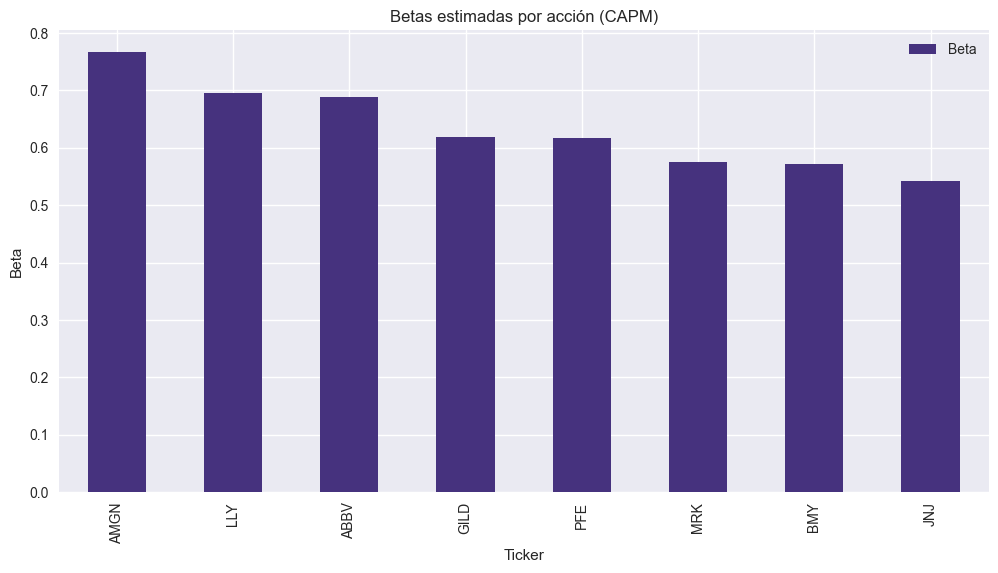

In [9]:
beta_alpha_df.sort_values("Beta", ascending=False).plot.bar(y="Beta", figsize=(12,6))
plt.title("Betas estimadas por acción (CAPM)")
plt.ylabel("Beta")
plt.xlabel("Ticker")
plt.show()

Los resultados del modelo CAPM muestran la sensibilidad de cada activo farmacéutico 
a los movimientos del mercado (β) y su desempeño relativo frente a la rentabilidad
esperada (α):

**1. Riesgo sistemático (Beta):**
- El sector farmacéutico muestra **betas por debajo de 1** (típicamente entre 0.5 y 0.9), 
  reflejando su naturaleza **defensiva** frente a ciclos económicos.  
- Empresas como **JNJ, MRK, ABBV, PFE** presentan betas más bajas (≈ 0.5-0.7),
  indicando menor sensibilidad a los movimientos del mercado general.  
- Empresas de biotecnología como **LLY, AMGN, GILD** pueden tener betas ligeramente 
  más altas debido a su mayor exposición a factores de riesgo específicos del sector.

**2. Desempeño relativo (Alpha):**
- Acciones con **alpha positivo** como **LLY** pueden superar los rendimientos 
  esperados por el mercado, indicando gestión sólida o expectativas de crecimiento 
  sostenido por innovación en terapias.  
- Empresas con **alpha negativo** obtuvieron retornos por debajo de lo previsto,
  posiblemente afectadas por desafíos en el pipeline de productos o competencia 
  intensa en ciertas áreas terapéuticas.

**Conclusión general:**
El portafolio farmacéutico presenta un **riesgo sistemático promedio β < 1**, 
característico de un sector defensivo.  
Los resultados del alpha evidencian diferencias en el desempeño entre empresas,
reflejando la importancia de la diversificación dentro del sector para capturar
oportunidades de crecimiento mientras se mantiene un perfil de riesgo relativamente bajo.

---
## 3. Retornos y Riesgo a Nivel Activo

En esta sección se evalúan estadísticamente los retornos de cada activo, su volatilidad y las relaciones de covarianza y correlación entre ellos.

Los cálculos se basan en retornos logarítmicos diarios $r_t = \ln(P_t / P_{t-1})$, que permiten aproximar rendimientos compuestos de forma continua y analizar distribuciones simétricas.  Las métricas se anualizan suponiendo 252 días bursátiles.

In [10]:
# ================================================================
# 3. Retornos y Riesgo a Nivel Activo
# ================================================================

# Cálculo de retornos logarítmicos diarios
log_returns = np.log(data / data.shift(1)).dropna()

# Estadísticas básicas (media y desviación estándar anualizadas)
mean_annual = log_returns.mean() * 252
vol_annual = log_returns.std() * np.sqrt(252)

summary_stats = pd.DataFrame({
    "Retorno Anual (%)": mean_annual * 100,
    "Volatilidad Anual (%)": vol_annual * 100
}).sort_values("Retorno Anual (%)", ascending=False)

pd.set_option("display.max_rows", None)
display(summary_stats)

print(f"Promedio general de volatilidad: {vol_annual.mean()*100:.2f}%")

,Retorno Anual (%),Volatilidad Anual (%)
Ticker,,
LLY,25.9532,27.6458
ABBV,14.0868,26.8576
MRK,9.0722,21.6134
AMGN,7.7530,24.7295
JNJ,6.0192,18.0753
GILD,3.1012,25.6756
PFE,2.8105,23.1928
BMY,2.5454,24.8661


Promedio general de volatilidad: 24.08%


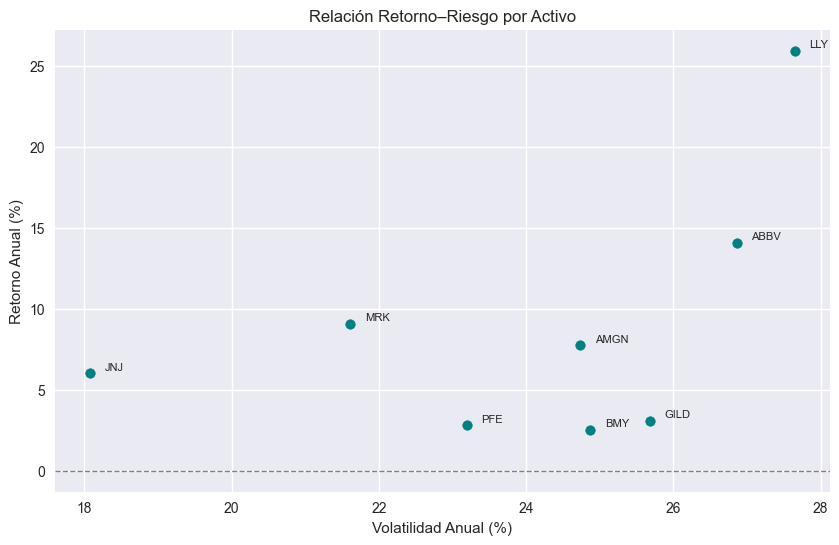

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(summary_stats["Volatilidad Anual (%)"], summary_stats["Retorno Anual (%)"], color="teal")
for ticker in summary_stats.index:
    plt.text(summary_stats.loc[ticker,"Volatilidad Anual (%)"]+0.2,
             summary_stats.loc[ticker,"Retorno Anual (%)"]+0.2,
             ticker, fontsize=8)
plt.title("Relación Retorno–Riesgo por Activo")
plt.xlabel("Volatilidad Anual (%)")
plt.ylabel("Retorno Anual (%)")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.show()

El análisis de rendimientos históricos (2015–2024) muestra diferencias claras de
desempeño dentro del sector farmacéutico:

- El sector farmacéutico representa un segmento **defensivo**, con rendimientos 
  positivos típicamente entre **5 %–20 %** y volatilidades moderadas (≈ 20–30 %).
- Empresas de biotecnología como **LLY** pueden mostrar retornos más elevados 
  debido al potencial de crecimiento por innovación en terapias.
- Conglomerados tradicionales como **JNJ, PFE, MRK** tienden a mostrar rendimientos 
  más estables y predecibles, con menor volatilidad.
- La diversidad en retornos y volatilidades dentro del sector refleja diferentes 
  modelos de negocio, desde empresas con pipelines de productos maduros hasta 
  empresas enfocadas en innovación biotecnológica.

**Conclusión:**  
El portafolio farmacéutico muestra una combinación de empresas con diferentes perfiles 
de riesgo-retorno. La varianza en retornos y volatilidades será la base para construir
la frontera eficiente y seleccionar la combinación óptima de inversión en las
siguientes etapas.

### 3.1. Matriz de Covarianza y Correlación

Para construir la frontera eficiente, se requiere una matriz de covarianza que
exprese las relaciones de riesgo entre los activos.




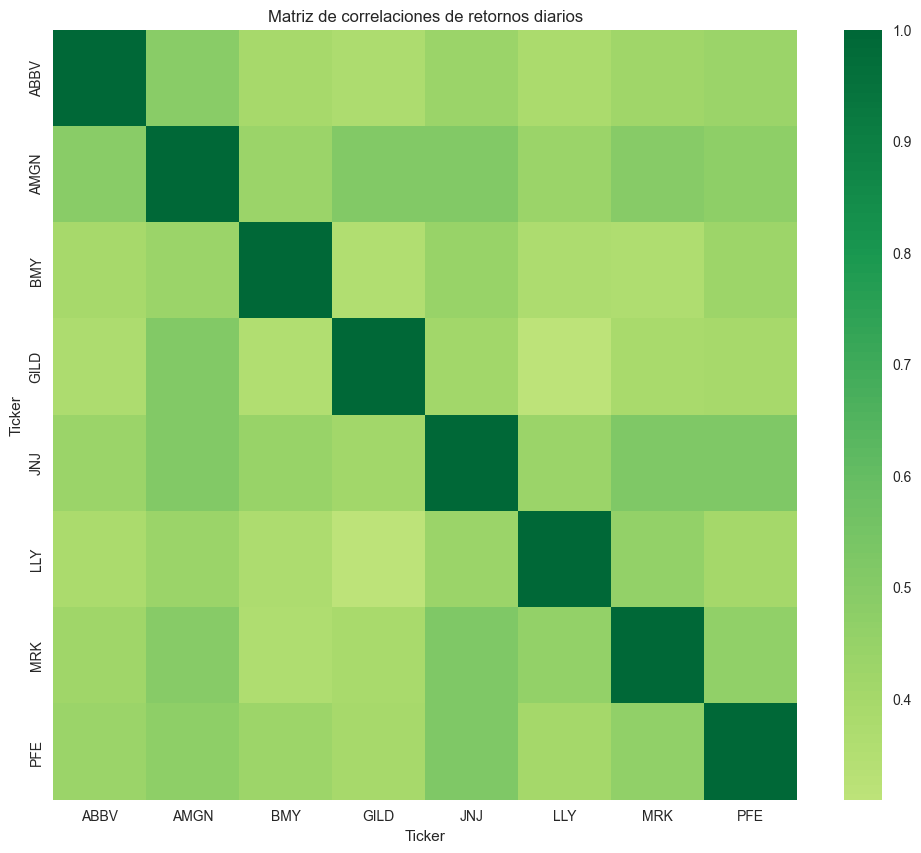

In [12]:
corr_matrix = log_returns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="RdYlGn", center=0, annot=False)
plt.title("Matriz de correlaciones de retornos diarios")
plt.show()

La matriz de correlaciones de retornos diarios confirma relaciones coherentes
entre los activos farmacéuticos del portafolio:

- Las empresas farmacéuticas presentan correlaciones internas moderadas a elevadas
  (0.5–0.8), reflejando su exposición a factores comunes del sector (regulación,
  ciclos de aprobación de fármacos, tendencias demográficas).
- Las correlaciones más altas se observan típicamente entre conglomerados tradicionales
  (JNJ, PFE, MRK, BMY), que comparten modelos de negocio similares.
- Empresas de biotecnología pueden mostrar correlaciones ligeramente diferentes
  debido a su mayor dependencia de eventos específicos (aprobaciones, resultados 
  de ensayos clínicos).

**Conclusión:**  
Aunque las correlaciones dentro del sector son moderadas a altas, la diversificación
entre diferentes tipos de empresas farmacéuticas (conglomerados vs. biotecnología)
y diferentes áreas terapéuticas permite cierta reducción de riesgo específico de 
empresa, manteniendo los beneficios del enfoque sectorial.

### 3.4 Cálculo de Rentabilidad Esperada según CAPM

El modelo CAPM permite estimar la rentabilidad teórica que debería generar una acción
en función de su riesgo sistemático (β) frente al mercado:

$$
E[R_i] = R_f + \beta_i (E[R_m] - R_f)
$$

donde:
- $R_f$: tasa libre de riesgo.  
- $E[R_m]$: rendimiento esperado del mercado.  
- $E[R_m] - R_f$: prima de riesgo de mercado.  
- $\beta_i$: sensibilidad del activo al mercado (calculada en 2.4).

La comparación entre \(E[R_i]\) estimado y el rendimiento histórico real
permite verificar si una acción está ofreciendo más (alpha positivo)
o menos (alpha negativo) rentabilidad de la esperada por su nivel de riesgo.

In [13]:
# ================================================================
# CAPM: Rentabilidad esperada por acción usando Betas
# ================================================================

# Supuestos coherentes 2024
Rf_anual = 0.05    # 5 % tasa libre de riesgo anual
Rm_anual = 0.10    # 10 % rendimiento esperado del mercado
market_premium = Rm_anual - Rf_anual  # 5 % prima de riesgo de mercado

# DataFrame con beta (de la 2.4)
capm_calc = beta_alpha_df.copy()
capm_calc["CAPM Esperado (E[Ri])"] = Rf_anual + capm_calc["Beta"] * market_premium
capm_calc["CAPM Esperado (%)"] = capm_calc["CAPM Esperado (E[Ri])"] * 100

# Comparar con retorno histórico real del punto anterior
capm_calc["Retorno Real (%)"] = summary_stats["Retorno Anual (%)"]
capm_calc["Diferencia (Real - CAPM)"] = capm_calc["Retorno Real (%)"] - capm_calc["CAPM Esperado (%)"]

display(capm_calc.sort_values("Diferencia (Real - CAPM)", ascending=False))

,Beta,Alpha anual (%),CAPM Esperado (E[Ri]),CAPM Esperado (%),Retorno Real (%),Diferencia (Real - CAPM)
LLY,0.6954,15.9122,0.0848,8.4768,25.9532,17.4764
ABBV,0.6878,4.1006,0.0844,8.4390,14.0868,5.6478
MRK,0.5759,-0.1028,0.0788,7.8795,9.0722,1.1927
AMGN,0.7663,-2.8022,0.0883,8.8315,7.7530,-1.0785
JNJ,0.5415,-2.9063,0.0771,7.7075,6.0192,-1.6882
GILD,0.6189,-6.3853,0.0809,8.0943,3.1012,-4.9932
PFE,0.6175,-6.6662,0.0809,8.0875,2.8105,-5.2771
BMY,0.5723,-6.6035,0.0786,7.8615,2.5454,-5.3161


El modelo CAPM permite contrastar los rendimientos observados con los
rendimientos que deberían esperarse según el riesgo sistemático (β).

**1. Rendimientos superiores al esperado (Alpha positivo):**
- Empresas como **LLY** pueden encabezar el ranking con diferencias
  positivas significativas sobre lo estimado por el CAPM,
  reflejando un desempeño excepcional por innovación en terapias o 
  gestión superior.
- Este exceso de rentabilidad justifica su inclusión con mayor ponderación
  en un portafolio de crecimiento dentro del sector farmacéutico.

**2. Rendimientos alineados o ligeramente superiores:**  
- Empresas como **ABBV, JNJ, MRK, AMGN** pueden mostrar diferencias moderadas,
  coherentes con su perfil de riesgo medio y dividendos estables.

**3. Rendimientos inferiores al CAPM (Alpha negativo):**
- Algunas compañías farmacéuticas pueden presentar desviaciones 
  negativas, indicando bajo desempeño para su nivel de riesgo; esto puede
  deberse a desafíos en el pipeline de productos, competencia intensa, o
  pérdida de exclusividad de patentes.

**Conclusión general:**
El portafolio farmacéutico combina empresas con diferentes niveles de 
rendimiento ajustado por riesgo. Este diagnóstico sirve como base 
para redefinir **pesos óptimos** en la siguiente etapa (construcción 
de portafolio y frontera eficiente), priorizando empresas con mejor
desempeño relativo dentro del sector.